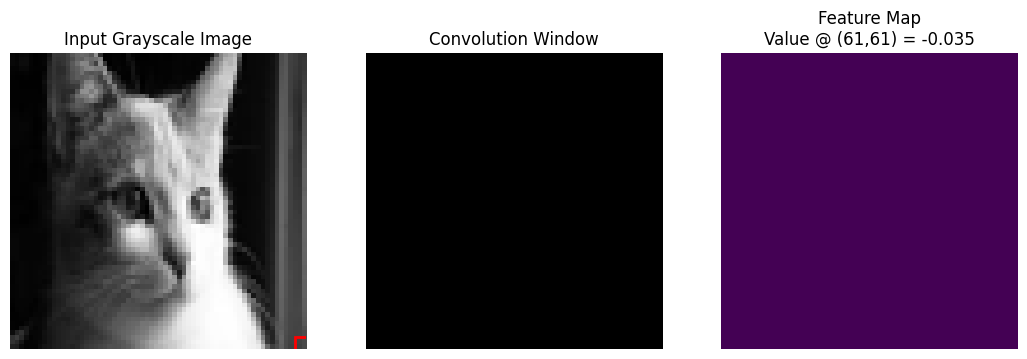

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
from PIL import Image

# --------------------------------------------------
# Setup
# --------------------------------------------------
os.makedirs("gifs", exist_ok=True)

# --------------------------------------------------
# Load REAL image & convert to grayscale
# --------------------------------------------------
img = Image.open(".\Images\Cat.jpg").convert("L")  # 👈 change filename if needed
img = img.resize((64, 64))                 # resize for smooth animation
image = np.array(img, dtype=float) / 255.0

H, W = image.shape

# --------------------------------------------------
# Define convolution kernel (edge detector)
# --------------------------------------------------
kernel = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

k = kernel.shape[0]

# Output feature map
out_h = H - k + 1
out_w = W - k + 1
feature_map = np.zeros((out_h, out_w))

# --------------------------------------------------
# Precompute convolution steps
# --------------------------------------------------
steps = []
for i in range(out_h):
    for j in range(out_w):
        patch = image[i:i+k, j:j+k]
        value = np.sum(patch * kernel)
        steps.append((i, j, patch.copy(), value))

# --------------------------------------------------
# Plot layout
# --------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
ax_img, ax_patch, ax_feat = axes

# Input image
img_plot = ax_img.imshow(image, cmap="gray")
ax_img.set_title("Input Grayscale Image")
ax_img.axis("off")

# Sliding window view
patch_plot = ax_patch.imshow(np.zeros((k, k)), cmap="gray")
ax_patch.set_title("Convolution Window")
ax_patch.axis("off")

# Feature map
feat_plot = ax_feat.imshow(feature_map, cmap="viridis")
ax_feat.set_title("Feature Map")
ax_feat.axis("off")

# Sliding rectangle
rect = Rectangle((0, 0), k, k, edgecolor="red", facecolor="none", lw=2)
ax_img.add_patch(rect)

# --------------------------------------------------
# Animation functions
# --------------------------------------------------
def init():
    feat_plot.set_data(np.zeros_like(feature_map))
    patch_plot.set_data(np.zeros((k, k)))
    rect.set_xy((0, 0))
    return [patch_plot, feat_plot, rect]

def update(frame):
    i, j, patch, value = steps[frame]

    # Move window
    rect.set_xy((j, i))

    # Update patch view
    patch_plot.set_data(patch)

    # Progressive feature map
    fm = feature_map.copy()
    fm[i, j] = value
    feat_plot.set_data(fm)

    ax_feat.set_title(f"Feature Map\nValue @ ({i},{j}) = {value:.3f}")
    return [patch_plot, feat_plot, rect]

# --------------------------------------------------
# Animation (SAFE CONFIG)
# --------------------------------------------------
ani = FuncAnimation(
    fig,
    update,
    frames=len(steps),
    init_func=init,
    interval=60,
    blit=False
)

# FORCE FIRST FRAME (Matplotlib save bug fix)




In [3]:
init()
update(0)
fig.canvas.draw()

# Save GIF
ani.save("gifs/cnn_real_image_convolution_cat.gif", writer="pillow")

plt.show()


In [4]:
from matplotlib.animation import PillowWriter

fig.set_dpi(80)

writer = PillowWriter(fps=8)

with writer.saving(fig, "gifs/cnn_real_image_convolution_cat.gif", dpi=80):
    for i in range(0, len(steps), 10):  # stride = 10
        update(i)
        writer.grab_frame()

plt.show()
